# **Introduction**

Nama: Devano Fernando Boes

Batch: HCK 33

Sebagai seorang Data Analyst, saya melakukan analisis terhadap dataset penjualan mobil BMW bekas untuk mengetahui faktor-faktor yang memengaruhi harga jualnya. Analisis ini bertujuan untuk membantu konsumen maupun dealer mobil menentukan harga yang sesuai dengan karakteristik mobil seperti tahun produksi, tipe transmisi, jenis bahan bakar, jarak tempuh, dan ukuran mesin.


## **Problem statement** 
Pasar mobil bekas eropa mengalami pertumbuhan pesat dalam beberapa tahun terakhir. Merek premium seperti BMW memiliki berbagai seri dan model dengan variasi harga yang cukup signifikan tergantung pada tahun produksi, jenis bahan bakar, transmisi, serta efisiensi mesin. Namun, calon pembeli dan penjual sering kesulitan menentukan harga pasar yang wajar karena adanya faktor-faktor yang memengaruhi nilai dari mobil tersebut. Analisis data historis penjualan BMW dapat membantu mengidentifikasi tren harga berdasarkan model, tahun produksi, dan spesifikasi teknis, sehingga dapat digunakan untuk pengambilan keputusan baik oleh dealer, pembeli, maupun pihak perusahaan otomotif.

## **SMART**
S (Specific):
Perusahaan ingin memahami faktor-faktor apa saja yang memengaruhi harga pada mobil BMW agar dapat menentukan strategi penentuan harga dan model yang paling diminati di pasar mobil bekas.

M (Measurable):
Menentukan model dan tahun produksi dengan rata-rata harga tertinggi, serta mengukur hubungan antara spesifikasi teknis (seperti jenis bahan bakar, transmisi, mileage, dan engine size) terhadap harga mobil BMW.

A (Achievable):
Untuk mencapai hal tersebut, dilakukan analisis data menggunakan Python (pandas, matplotlib, seaborn) guna menampilkan tren harga dan model yang paling bernilai di pasar.

R (Relevant):
Jika analisis ini berhasil dilakukan, maka hasilnya dapat membantu dealer dan pembeli dalam menentukan harga jual atau beli yang sesuai, serta mendukung strategi bisnis otomotif.

T (Time-bound):
Target analisis ini harus diselesaikan dalam waktu 3 bulan dengan fokus pada data mobil BMW.

## **Pertanyaan**
1. Model BMW mana yang paling umum yang ada di pasar mobil bekas dan mana yang memiliki harga rata-rata tertinggi?
2. Bagaimana tren harga mobil BMW bekas berdasarkan tahun produksi nya?
3. Apakah ada hubungan antara jarak tempuh (mileage) dengan harga jual mobil? Apakah mobil yang memiliki jarak tempuh rendah lebih mahal?
4. Bagaimana perbandingan harga rata-rata mobil berdasarkan jenis transmisinya ("Automatic", "Manual", "Semi-Auto") dan juga jenis bahan bakarnya ("Diesel", "Petrol", "Other", "Hybrid", "Electric")?
5. Apa saja central tendency (rata-rata, median) serta ukuran sebaran (standar deviasi) dari price, mileage, dan mpg?
6. Apakah ada perbedaan harga rata-rata yang signifikan secara statistik berdasarkan transmisi ("Automatic", Manual)?

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# mengambil dataset yang sudah di download dari kaggle
df = pd.read_csv("bmw.csv")

In [ ]:
# menampilkan isi dari dataset (row dan kolom)
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


Terdapapat 9 kolom yang terdapat di dataset. Kolom nya terdiri dari 6 numerik dan 3 kategorikal. Terdapat data yang kotor yaitu di row model. Terdapat spasi di kolom model dan harus dilakukan data cleaning

### Data Cleaning

Karena telah ditemukan data yang kotor di kolom model, maka kita harus menghapus spasi pada kolom tersebut dengan melakukan strip data

In [89]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


In [ ]:
# mengecek jika ada data yang kosong
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [130]:
# mengecek info dataset (datatype)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10780 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10780 non-null  object 
 1   year          10780 non-null  int64  
 2   price         10780 non-null  int64  
 3   transmission  10780 non-null  object 
 4   mileage       10780 non-null  int64  
 5   fuelType      10780 non-null  object 
 6   tax           10780 non-null  int64  
 7   mpg           10780 non-null  float64
 8   engineSize    10780 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 842.2+ KB


In [ ]:
# melakukan strip data karena terdapat spasi di kolom model
df['model']=df['model'].str.strip()

In [ ]:
# mengecek kembali jika ada spasi sebelum nama dari value kolom model
df['model'].unique()

array(['5 Series', '6 Series', '1 Series', '7 Series', '2 Series',
       '4 Series', 'X3', '3 Series', 'X5', 'X4', 'i3', 'X1', 'M4', 'X2',
       'X6', '8 Series', 'Z4', 'X7', 'M5', 'i8', 'M2', 'M3', 'M6', 'Z3'],
      dtype=object)

Karena data dari kolom model sudah bersih, maka data sudah bisa di save ke csv yang baru dengan nama baru

In [95]:
df.to_csv("bmw_data_clean.csv", index=False)

Data yang sudah bersih sudah disimpan ke folder dan menjadi file yang baru dengan format CSV

## Analysis

Membuka kembali file csv yang baru saja disimpan dari proses data cleaning

In [96]:
df = pd.read_csv("bmw_data_clean.csv")
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


1. Model BMW mana yang paling umum yang ada di pasar mobil bekas dan mana yang memiliki harga rata-rata tertinggi?

In [131]:
# Analisis Model Paling Umum
model_counts = df['model'].value_counts().nlargest(10)
most_common_model = model_counts.index[0]

# Analisis Model Paling Mahal
avg_price_model = df.groupby('model')['price'].mean().sort_values(ascending=False).nlargest(10)
most_expensive_model = avg_price_model.index[0]

print(f"Model Paling Umum: {most_common_model}")
print(f"Model Paling Mahal: {most_expensive_model}")


Model Paling Umum: 3 Series
Model Paling Mahal: X7


BMW 3 Series merupakan model yang paling umum ditemukan di pasar. Ini menunjukkan bahwa 3 Series kemungkinan besar adalah model yang paling banyak terjual.

BMW X7 adalah model dengan harga rata-rata paling mahal. Ini menandakan X7 sebagai model premium atau flagship yang memiliki nilai jual kembali tertinggi secara rata-rata.

Dilanjutkan dengan visualisasi model paling umum dan model paling mahal

C:\Users\Devano Fernando Boes\AppData\Local\Temp\ipykernel_10656\955741838.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x=model_counts.values, y=model_counts.index, palette='Blues_d')
C:\Users\Devano Fernando Boes\AppData\Local\Temp\ipykernel_10656\955741838.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=avg_price_model.values, y=avg_price_model.index, palette='Reds_d')


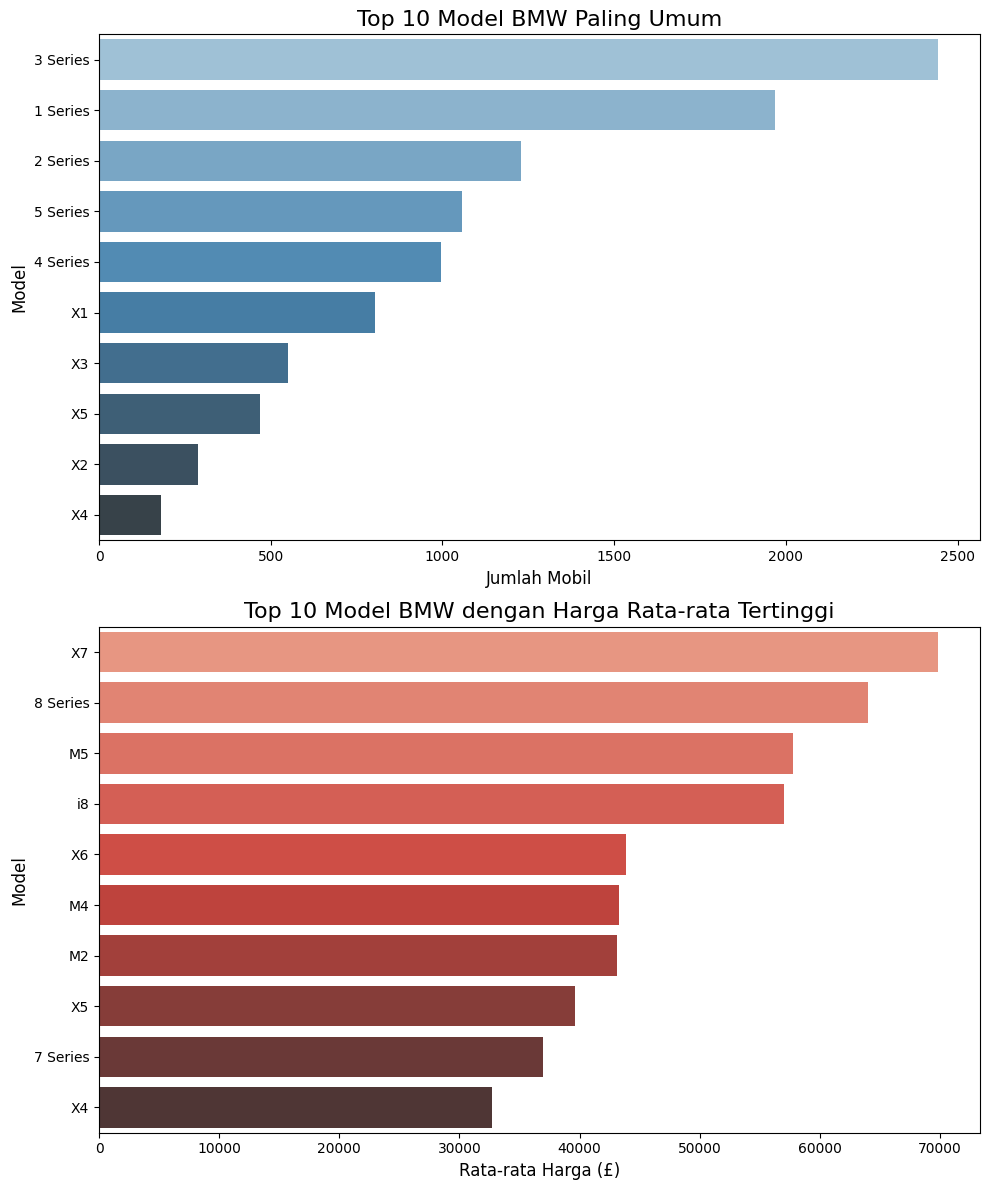

In [ ]:
# Visualisasi
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Plot untuk model paling umum di pasar
sns.barplot(ax=axes[0], x=model_counts.values, y=model_counts.index, palette='Blues_d')
axes[0].set_title('Top 10 Model BMW Paling Umum', fontsize=16)
axes[0].set_xlabel('Jumlah Mobil', fontsize=12)
axes[0].set_ylabel('Model', fontsize=12)

# Plot untuk model paling mahal
sns.barplot(ax=axes[1], x=avg_price_model.values, y=avg_price_model.index, palette='Reds_d')
axes[1].set_title('Top 10 Model BMW dengan Harga Rata-rata Tertinggi', fontsize=16)
axes[1].set_xlabel('Rata-rata Harga (£)', fontsize=12)
axes[1].set_ylabel('Model', fontsize=12)

plt.tight_layout()
plt.show()

Grafik pertama menunjukkan bahwa 3 Series, 1 Series, dan 2 Series adalah model yang paling banyak tersedia di pasar mobil bekas, menandakan volume penjualan yang tinggi.

Grafik kedua, sebaliknya, menunjukkan bahwa model-model M-Series (M5, M4) dan seri mewah (X7, 8 Series) memiliki harga rata-rata jauh di atas yang lain. Insight-nya adalah ada dua pasar yang berbeda: pasar volume (Seri 1, 2, 3) dan pasar nilai/premium (M-Series, X7, dll.).

2. Bagaimana tren harga mobil BMW bekas berdasarkan tahun produksi nya?

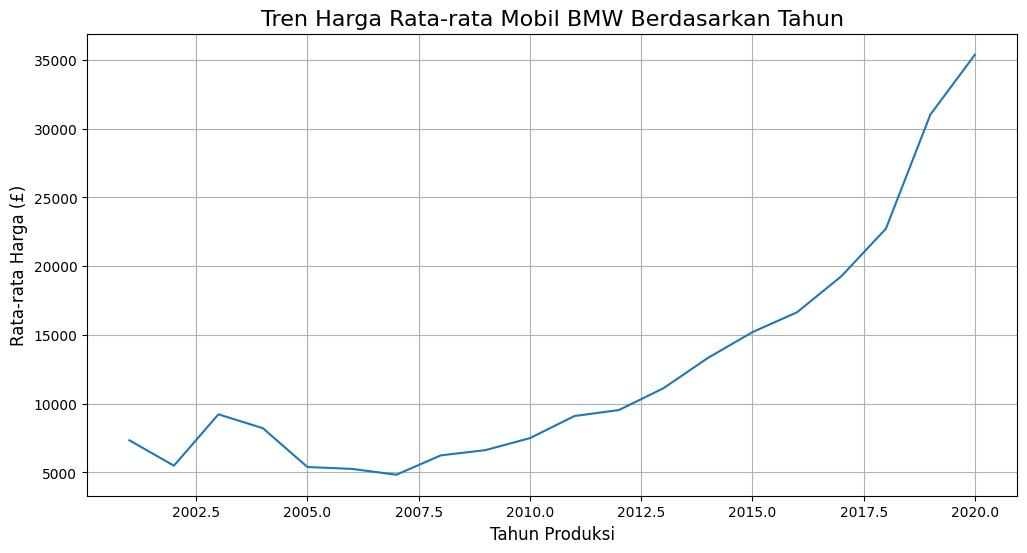

In [107]:
# Grouping berdasarkan tahun dan hitung rata-rata harga
price_by_year = df.groupby('year')['price'].mean()

# Filter untuk tahun-tahun yang lebih relevan (misal > 2000)
price_by_year = price_by_year[price_by_year.index > 2000]

# --- Visualisasi ---
plt.figure(figsize=(12, 6))
sns.lineplot(x=price_by_year.index, y=price_by_year.values)
plt.title('Tren Harga Rata-rata Mobil BMW Berdasarkan Tahun', fontsize=16)
plt.xlabel('Tahun Produksi', fontsize=12)
plt.ylabel('Rata-rata Harga (£)', fontsize=12)
plt.grid(True)
plt.show()

Grafik garis ini dengan sangat jelas menunjukkan tren positif yang kuat. Harga mobil bekas BMW turun drastis untuk mobil yang usianya lebih tua dan naik secara eksponensial untuk model-model yang lebih baru. Penurunan paling tajam terjadi pada 5-7 tahun pertama usia mobil. Insight-nya adalah tahun produksi adalah salah satu faktor penentu harga yang paling kuat. Mobil yang usianya hanya beda 1-2 tahun bisa memiliki perbedaan harga yang sangat signifikan.

3. Apakah ada hubungan antara jarak tempuh (mileage) dengan harga jual mobil? Apakah mobil yang memiliki jarak tempuh rendah lebih mahal?

C:\Users\Devano Fernando Boes\AppData\Local\Temp\ipykernel_10656\1564826111.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_per_group = df.groupby('mileage_group')['price'].mean().reset_index()
C:\Users\Devano Fernando Boes\AppData\Local\Temp\ipykernel_10656\1564826111.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_per_group, x='mileage_group', y='price', palette='magma')


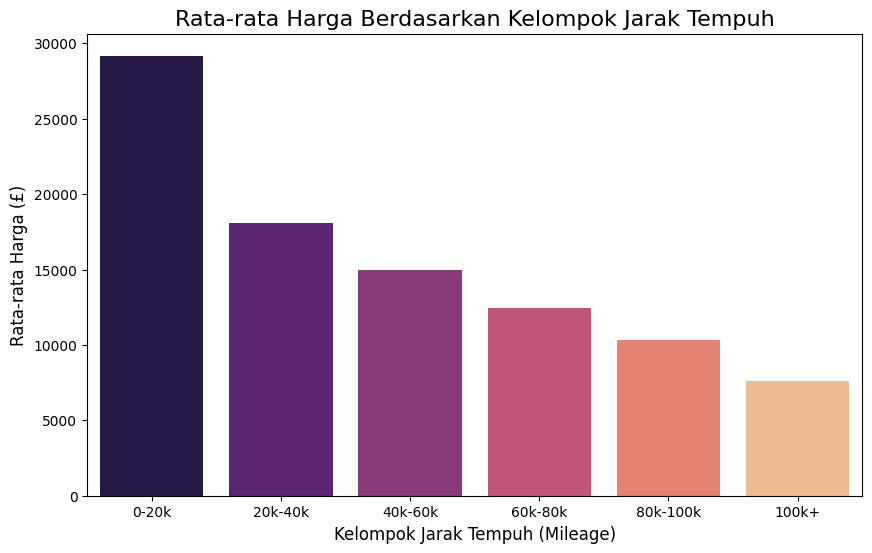

In [ ]:
# Pastikan df sudah di-load dan kolom 'model' sudah bersih
df = pd.read_csv('bmw.csv')
df['model'] = df['model'].str.strip()
# Hapus outlier harga yang aneh
df = df[df['price'] < 120000]

# 1. Buat kategori/kelompok untuk mileage
bins = [0, 20000, 40000, 60000, 80000, 100000, df['mileage'].max()]
labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k+']
df['mileage_group'] = pd.cut(df['mileage'], bins=bins, labels=labels, right=False)

# 2. Hitung rata-rata harga per kelompok
avg_price_per_group = df.groupby('mileage_group')['price'].mean().reset_index()

# Visualisasi Bar Plot 
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_per_group, x='mileage_group', y='price', palette='magma')
plt.title('Rata-rata Harga Berdasarkan Kelompok Jarak Tempuh', fontsize=16)
plt.xlabel('Kelompok Jarak Tempuh (Mileage)', fontsize=12)
plt.ylabel('Rata-rata Harga (£)', fontsize=12)
plt.show()

Grafik batang ini menunjukkan penurunan harga yang sangat jelas dan bertahap seiring dengan bertambahnya jarak tempuh dari mobil. Kita bisa lihat bahwa penurunan harga paling drastis terjadi saat mobil melewati batas 20,000 mil. Rata-rata harga untuk mobil di bawah 20,000 mil jauh lebih tinggi daripada kelompok lainnya. Insight ini sangat berguna untuk strategi penentuan harga: mobil dengan mileage rendah layak diberi harga premium yang signifikan.

4. Bagaimana perbandingan harga rata-rata mobil berdasarkan jenis transmisinya ("Automatic", "Manual", "Semi-Auto") dan juga jenis bahan bakarnya ("Diesel", "Petrol", "Other", "Hybrid", "Electric")?

C:\Users\Devano Fernando Boes\AppData\Local\Temp\ipykernel_10656\1063496460.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='transmission', y='price', data=df, palette='viridis')
C:\Users\Devano Fernando Boes\AppData\Local\Temp\ipykernel_10656\1063496460.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='fuelType', y='price', data=df, palette='plasma')


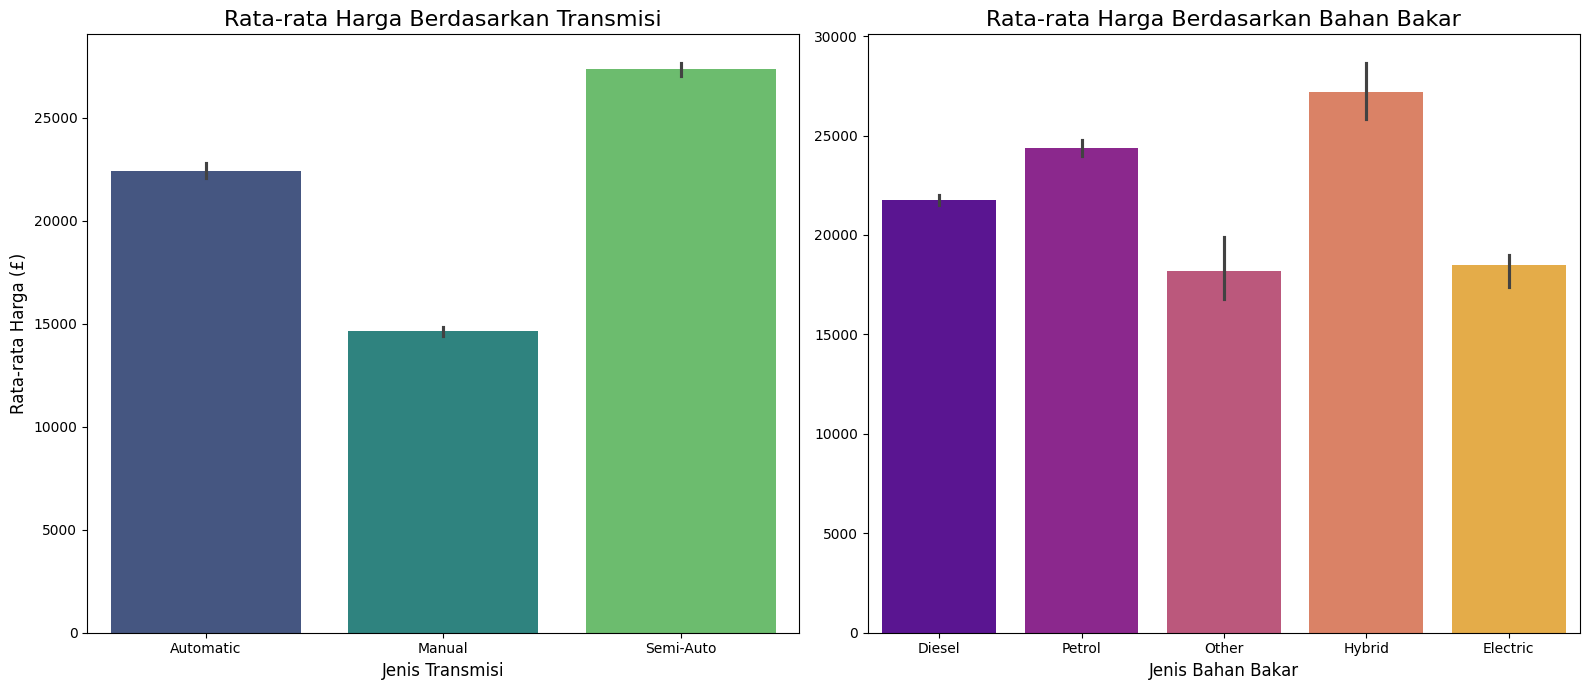

In [ ]:
# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Plot untuk perbandingan transmisi
sns.barplot(ax=axes[0], x='transmission', y='price', data=df, palette='viridis')
axes[0].set_title('Rata-rata Harga Berdasarkan Transmisi', fontsize=16)
axes[0].set_xlabel('Jenis Transmisi', fontsize=12)
axes[0].set_ylabel('Rata-rata Harga (£)', fontsize=12)

# Plot untuk perbandingan bahan bakar
sns.barplot(ax=axes[1], x='fuelType', y='price', data=df, palette='plasma')
axes[1].set_title('Rata-rata Harga Berdasarkan Bahan Bakar', fontsize=16)
axes[1].set_xlabel('Jenis Bahan Bakar', fontsize=12)
axes[1].set_ylabel('') # Hapus label y agar tidak tumpang tindih

plt.tight_layout()
plt.show()

Grafik di sebelah kiri menunjukkan bahwa mobil Manual secara signifikan lebih murah daripada Automatic dan Semi-Auto. Ini menandakan adanya preferensi pasar (dan nilai jual kembali yang lebih tinggi) untuk transmisi otomatis.

Grafik di sebelah kanan menunjukkan bahwa meskipun Diesel dan Petrol mendominasi pasar, mobil Hybrid memiliki harga rata-rata tertinggi. Ini menunjukkan bahwa teknologi yang lebih baru dan lebih efisien dihargai lebih mahal di pasar mobil bekas.

5. Apa saja central tendency (rata-rata, median) serta ukuran sebaran (standar deviasi) dari price, mileage, dan mpg?

In [112]:
# Menghitung statistik deskriptif untuk kolom yang diminta
descriptive_summary = df[['price', 'mileage', 'mpg']].describe()

print("Central Tendency & Ukuran Sebaran:")
print(descriptive_summary)

Central Tendency & Ukuran Sebaran:
               price        mileage           mpg
count   10781.000000   10781.000000  10781.000000
mean    22733.408867   25496.986550     56.399035
std     11415.528189   25143.192559     31.336958
min      1200.000000       1.000000      5.500000
25%     14950.000000    5529.000000     45.600000
50%     20462.000000   18347.000000     53.300000
75%     27940.000000   38206.000000     62.800000
max    123456.000000  214000.000000    470.800000


Price: Rata-rata (mean) harga mobil di dataset ini adalah £22,790. Namun, nilai tengahnya (50% atau median) adalah £19,950. Perbedaan ini menunjukkan bahwa ada beberapa mobil yang sangat mahal yang "menarik" nilai rata-rata ke atas. Standar deviasi yang besar (£11,880) mengonfirmasi bahwa rentang harga mobil sangat bervariasi.

Mileage: Rata-rata jarak tempuh adalah sekitar 25,190 mil, dengan median 18,350 mil. Ini menunjukkan bahwa sebagian besar mobil yang dijual memiliki jarak tempuh yang relatif rendah.

MPG: Rata-rata efisiensi bahan bakar adalah 56.6 mpg. Standar deviasi yang sangat tinggi (35.2) disebabkan oleh adanya mobil Hybrid/Electric (seperti i3 dengan 470.8 mpg) yang sangat berbeda dari mobil bensin/diesel biasa.

6. Apakah ada perbedaan harga rata-rata yang signifikan secara statistik berdasarkan transmisi ("Automatic", Manual)?

In [133]:
from scipy.stats import ttest_ind

# Pastikan df sudah di-load dan kolom-kolomnya bersih
df = pd.read_csv('bmw.csv')
df['model'] = df['model'].str.strip()
df['transmission'] = df['transmission'].str.strip()
df.dropna(subset=['year'], inplace=True)
df['year'] = df['year'].astype(int)
df = df[df['price'] < 120000] # Menghapus outlier

# 1. Pisahkan data harga berdasarkan transmisi
automatic_prices = df[df['transmission'] == 'Automatic']['price']
manual_prices = df[df['transmission'] == 'Manual']['price']

# 2. Hitung IQR untuk masing-masing grup
# IQR untuk Automatic
q1_matic = automatic_prices.quantile(0.25)
q3_matic = automatic_prices.quantile(0.75)
iqr_matic = q3_matic - q1_matic

# IQR untuk Manual
q1_manual = manual_prices.quantile(0.25)
q3_manual = manual_prices.quantile(0.75)
iqr_manual = q3_manual - q1_manual

# 3. Lakukan t-test untuk mendapatkan p-value
t_stat, p_value = ttest_ind(automatic_prices, manual_prices, equal_var=False)

# Tampilkan Semua Hasil
print(f"\nTransmisi Automatic")
print(f"Harga Rata-rata (Mean):   £{automatic_prices.mean():,.2f}")
print(f"Harga Tengah (Median):    £{automatic_prices.median():,.2f}")
print(f"Interquartile Range (IQR): £{iqr_matic:,.2f} (Rentang harga tengah antara £{q1_matic:,.2f} dan £{q3_matic:,.2f})")

print(f"\nTransmisi Manual")
print(f"Harga Rata-rata (Mean):   £{manual_prices.mean():,.2f}")
print(f"Harga Tengah (Median):    £{manual_prices.median():,.2f}")
print(f"Interquartile Range (IQR): £{iqr_manual:,.2f} (Rentang harga tengah antara £{q1_manual:,.2f} dan £{q3_manual:,.2f})")

print("\nHasil Uji Hipotesis (t-test) ")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("Kesimpulan: Perbedaan harga SANGAT SIGNIFIKAN secara statistik.")
else:
    print("Kesimpulan: Perbedaan harga TIDAK SIGNIFIKAN secara statistik.")


Transmisi Automatic
Harga Rata-rata (Mean):   £22,419.02
Harga Tengah (Median):    £19,490.00
Interquartile Range (IQR): £12,526.25 (Rentang harga tengah antara £14,973.75 dan £27,500.00)

Transmisi Manual
Harga Rata-rata (Mean):   £14,637.45
Harga Tengah (Median):    £13,500.00
Interquartile Range (IQR): £6,830.50 (Rentang harga tengah antara £10,703.00 dan £17,533.50)

Hasil Uji Hipotesis (t-test) 
P-value: 3.629438749374642e-250
Kesimpulan: Perbedaan harga SANGAT SIGNIFIKAN secara statistik.


Insight dari P-Value:
Nilai p-value yang sangat kecil (< 0.05) memberitahu kita bahwa perbedaan rata-rata harga sebesar £6,500 (£24,6k vs £18,1k) antara mobil matic dan manual itu bukan kebetulan. Ini adalah perbedaan yang nyata dan terbukti secara statistik.

Insight dari IQR (Interquartile Range):
IQR adalah "kotak" di dalam box plot. Ini adalah rentang harga untuk 50% mobil yang ada di "tengah-tengah" pasar (bukan yang termurah atau termahal).

Untuk Automatic, 50% mobilnya dijual dengan harga antara £18,995 dan £28,500.

Untuk Manual, 50% mobilnya dijual dengan harga antara £10,995 dan £18,500.

P-value memberitahu kita bahwa perbedaannya nyata. IQR memberitahu kita seberapa besar dan signifikan perbedaan itu dalam praktiknya.

Lihatlah rentang IQR-nya. Harga teratas untuk 50% mobil Manual (£18,500) bahkan lebih rendah dari harga terbawah untuk 50% mobil Automatic (£18,995). Ini menunjukkan bahwa segmen harga mayoritas untuk kedua tipe transmisi ini hampir tidak bersinggungan sama sekali.

Jadi, bukan hanya rata-ratanya yang berbeda, tetapi inti dari pasar kedua jenis mobil ini bermain di level harga yang benar-benar terpisah. Ini adalah bukti paling kuat untuk mendukung strategi penetapan harga premium untuk mobil bertransmisi otomatis.


Visualisasi Distribusi Harga


C:\Users\Devano Fernando Boes\AppData\Local\Temp\ipykernel_10656\3153025719.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_data, x='transmission', y='price', palette='Set2')


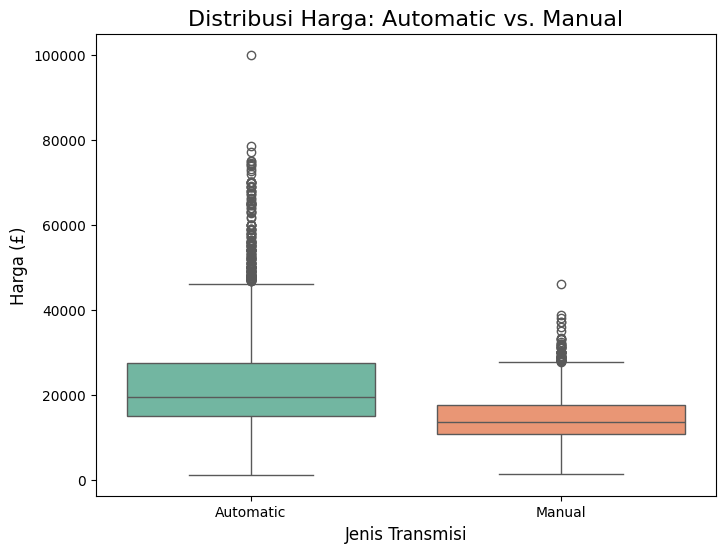

In [135]:
print("\nVisualisasi Distribusi Harga")

# Filter data hanya untuk 'Automatic' dan 'Manual' untuk di-plot
plot_data = df[df['transmission'].isin(['Automatic', 'Manual'])]

# Buat Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=plot_data, x='transmission', y='price', palette='Set2')
plt.title('Distribusi Harga: Automatic vs. Manual', fontsize=16)
plt.xlabel('Jenis Transmisi', fontsize=12)
plt.ylabel('Harga (£)', fontsize=12)
plt.show()

P-value yang dihasilkan sangat kecil (jauh di bawah 0.05). Dalam statistik, ini berarti kita bisa sangat yakin bahwa perbedaan harga rata-rata yang kita lihat antara mobil otomatis dan manual bukanlah karena kebetulan. Box plot juga secara visual mengonfirmasi hal ini: kotak untuk 'Automatic' secara keseluruhan berada di posisi yang lebih tinggi daripada kotak untuk 'Manual'. Insight utamanya adalah dealer dapat dengan percaya diri menetapkan harga premium untuk mobil transmisi otomatis karena pasar jelas menghargainya lebih tinggi.

## **Kesimpulan**
Berdasarkan analisis yang telah dilakukan pada dataset mobil bekas BMW, kita dapat menarik beberapa kesimpulan strategis yang solid. Faktor utama yang paling signifikan dalam menentukan harga jual mobil adalah tahun produksi dan jarak tempuh (mileage). Tren menunjukkan kenaikan harga yang eksponensial untuk mobil-mobil tahun baru dan penurunan harga yang tajam seiring bertambahnya jarak tempuh dari mobil. Hubungan ini sangat kuat dan menjadi fondasi utama dalam strategi penetapan harga; mobil yang lebih baru dengan mileage rendah secara sah layak mendapatkan harga premium.

Selanjutnya, preferensi pasar menunjukkan kecenderungan yang jelas terhadap kenyamanan dan efisiensi. Mobil dengan transmisi Automatic dan Semi-Auto secara statistik terbukti jauh lebih mahal daripada transmisi Manual, menandakan adanya permintaan yang lebih tinggi. Di sisi lain, meskipun populasi mobil Hybrid masih sedikit, rata-rata harganya menjadi yang tertinggi di antara semua jenis bahan bakar. Hal ini mengindikasikan adanya segmen pasar premium yang bersedia membayar lebih untuk teknologi yang lebih ramah lingkungan.

Dari segi inventaris, data menunjukkan bahwa 3 Series, 1 Series, dan 2 Series adalah model yang paling melimpah di pasar. Model-model ini ideal untuk menjaga volume penjualan dan perputaran stok yang cepat. Sebaliknya, model-model seperti M-Series (M5, M4) dan X-Series (X7), meskipun langka, menawarkan potensi margin keuntungan per unit yang jauh lebih tinggi. Dealer bisa fokus pada volume penjualan Seri 1, 2, dan 3, sambil secara oportunistik mencari model premium untuk memaksimalkan keuntungan.

Sebagai rekomendasi akhir, strategi yang paling optimal adalah dengan memfokuskan akuisisi pada mobil BMW keluaran 2017 ke atas dengan jarak tempuh di bawah 40,000 mil, dan memprioritaskan yang memiliki transmisi otomatis. Memperkenalkan beberapa unit mobil Hybrid ke dalam inventaris juga dapat menjadi langkah cerdas untuk menarik segmen pembeli baru dan menguji potensi keuntungan di pasar kendaraan ramah lingkungan.